In [45]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.api import OLS, add_constant

In [2]:
np.random.seed(42)
n = 200
sigma = 1

# 1. White Noise (WN): (Most General thus we can sample from any distribution) zero-mean, constant variance, uncorrelated
# w_t = (-1)^t * z_t
white_noise = ((-1) ** np.arange(n)) * np.random.normal(0, 1, size=n)

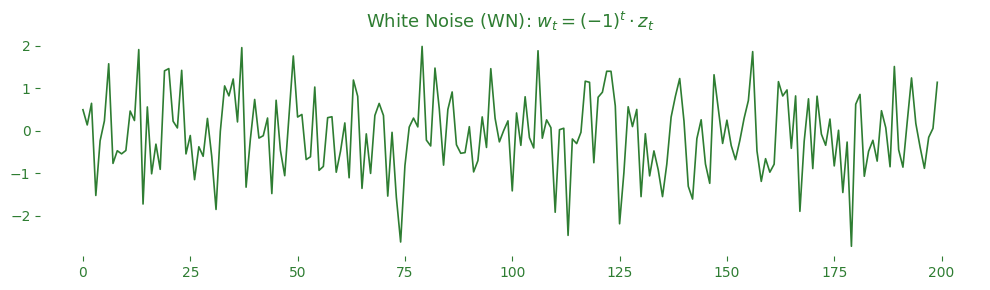

In [11]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 3))

# Colors & labels
colors = ["#2e7d32", "#3366cc", "#cc2277"]
titles = [
    "White Noise (WN): $w_t = (-1)^t \\cdot z_t$",
    "IID Noise: $w_t \\sim \\mathcal{U}(-1, 1)$",
    "Gaussian White Noise: $w_t \\sim \\mathcal{N}(0, 1)$"
]
noises = [white_noise]

ax.plot(noises[0], color=colors[0], linewidth=1.2)
ax.set_title(titles[0], fontsize=13, color=colors[0])
ax.tick_params(colors=colors[0])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("./assets/white_noise_example.png", dpi=300, transparent=True)
plt.show()

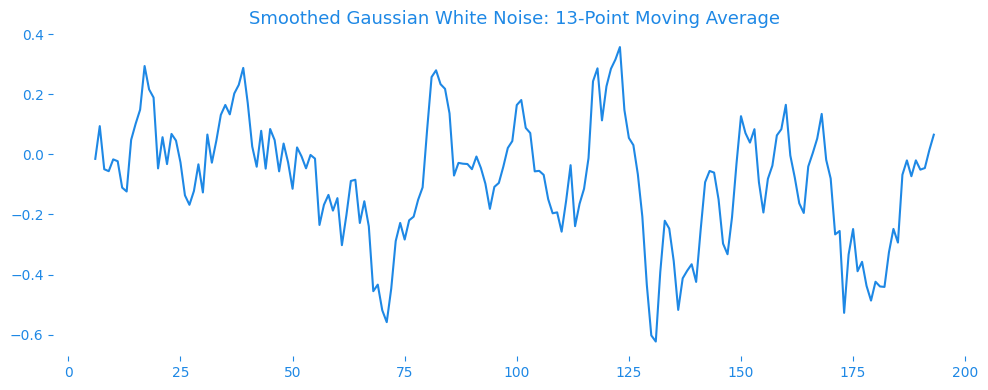

In [13]:
# --- 13-Point Moving Average ---
def moving_average(series, moving_window=13):
    return np.convolve(series, np.ones(moving_window) / moving_window, mode='valid')

smoothed_noise = moving_average(white_noise, moving_window=13)

# Adjusted time index since we're using 'valid' mode
smoothed_time = np.arange(6, len(white_noise) - 6)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 4))

# Plot
ax.plot(smoothed_time, smoothed_noise, color="#1e88e5", linewidth=1.5)

# Styling
ax.set_title("Smoothed Gaussian White Noise: 13-Point Moving Average", fontsize=13, color="#1e88e5")
ax.tick_params(colors="#1e88e5")
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("./assets/smoothed_white_noise.png", dpi=300, transparent=True)
plt.show()

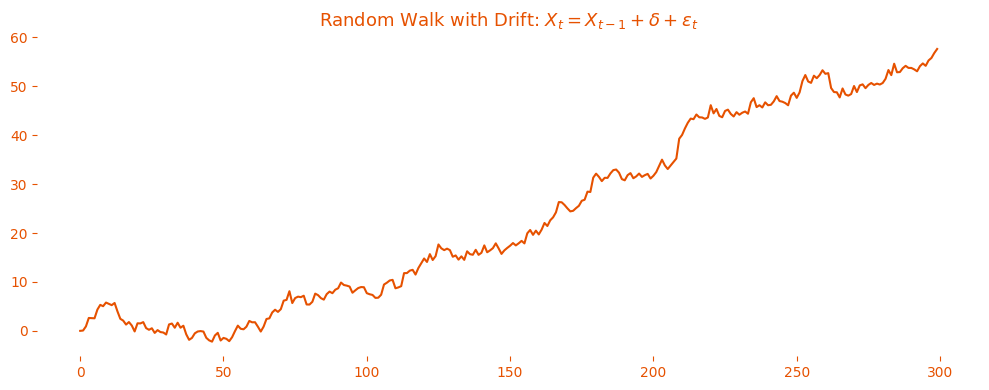

In [14]:
# --- Parameters ---
n = 300
delta = 0.2  # Drift term
np.random.seed(42)
noise = np.random.normal(0, 1, size=n)

# --- Generate Random Walk with Drift ---
random_walk = np.zeros(n)
for t in range(1, n):
    random_walk[t] = random_walk[t - 1] + delta + noise[t]

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.arange(n), random_walk, color="#e65100", linewidth=1.5)

# Styling
ax.set_title("Random Walk with Drift: $X_t = X_{t - 1} + \\delta + \\varepsilon_t$", fontsize=13, color="#e65100")
ax.tick_params(colors="#e65100")
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("./assets/random_walk_with_drift.png", dpi=300, transparent=True)
plt.show()


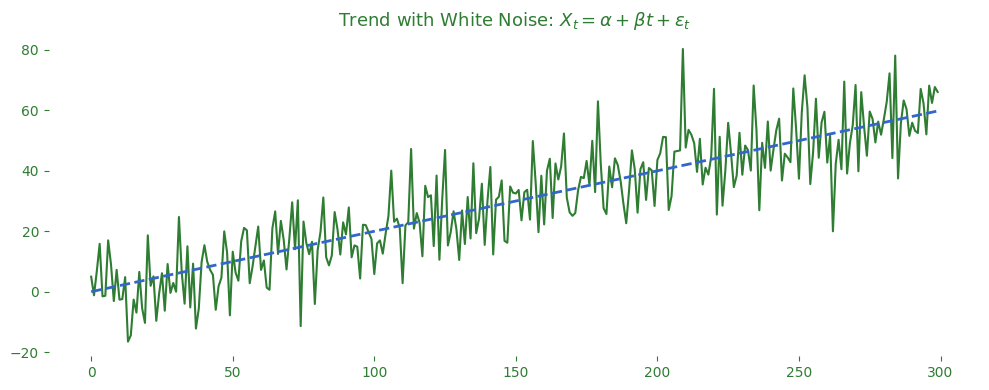

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
n = 300
trend_slope = 0.2  # Linear trend slope
np.random.seed(42)
noise = np.random.normal(0, 10, size=n)

# --- Generate Trend with White Noise ---
time = np.arange(n)
trend_series = trend_slope * time + noise
true_trend = trend_slope * time

# --- Plot (both on same figure) ---
fig, ax = plt.subplots(figsize=(10, 4))

# Noisy trend
ax.plot(time, trend_series, color="#2e7d32", linewidth=1.5, label="Trend with White Noise")

# Underlying straight line
ax.plot(time, true_trend, color="#3366cc", linewidth=2.0, linestyle="--", label="Underlying Trend")

# Styling
ax.set_title(r"Trend with White Noise: $X_t = \alpha + \beta t + \varepsilon_t$", fontsize=13, color="#2e7d32")
ax.tick_params(colors="#2e7d32")
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("./assets/trend_with_white_noise_and_line.png", dpi=300, transparent=True)
plt.show()


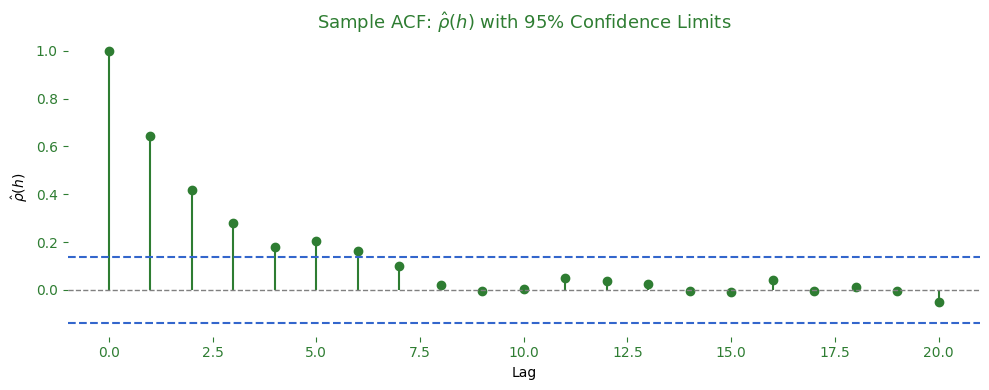

In [35]:
# --- 1. Generate AR(1) ---
np.random.seed(42)
n = 200
phi = 0.7
w = np.random.normal(0, 1, size=n)
x = np.zeros(n)
for t in range(1, n):
    x[t] = phi * x[t - 1] + w[t]

# --- 2. Compute ACF ---
acf_values = acf(x, nlags=20, fft=False)
lags = np.arange(len(acf_values))

# --- 3. Confidence limits (approx. normality) ---
stderr = 1.96 / np.sqrt(len(x))

# --- 4. Plot with consistent styling ---
fig, ax = plt.subplots(figsize=(10, 4))

stem = ax.stem(lags, acf_values, basefmt=" ")
plt.setp(stem.markerline, color="#2e7d32")
plt.setp(stem.stemlines, color="#2e7d32")
plt.setp(stem.baseline, visible=False)

# Add dashed confidence limits
ax.axhline(stderr, linestyle='--', color="#3366cc", linewidth=1.5)
ax.axhline(-stderr, linestyle='--', color="#3366cc", linewidth=1.5)

ax.axhline(0, linestyle='--', color='gray', linewidth=1)

ax.set_title(r"Sample ACF: $\hat{\rho}(h)$ with 95% Confidence Limits",
             fontsize=13, color="#2e7d32")
ax.set_xlabel("Lag")
ax.set_ylabel(r"$\hat{\rho}(h)$")
ax.tick_params(colors="#2e7d32")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("./assets/sample_acf_plot_dashed.png", dpi=300, transparent=True)
plt.show()


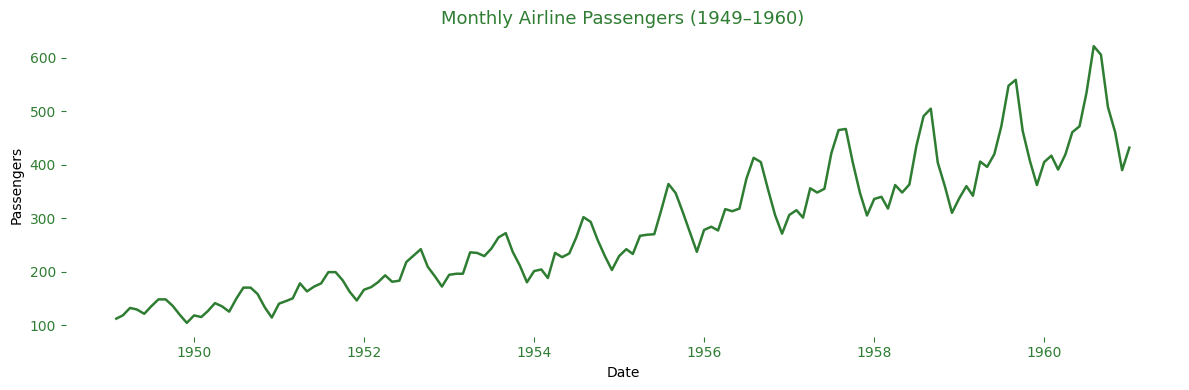

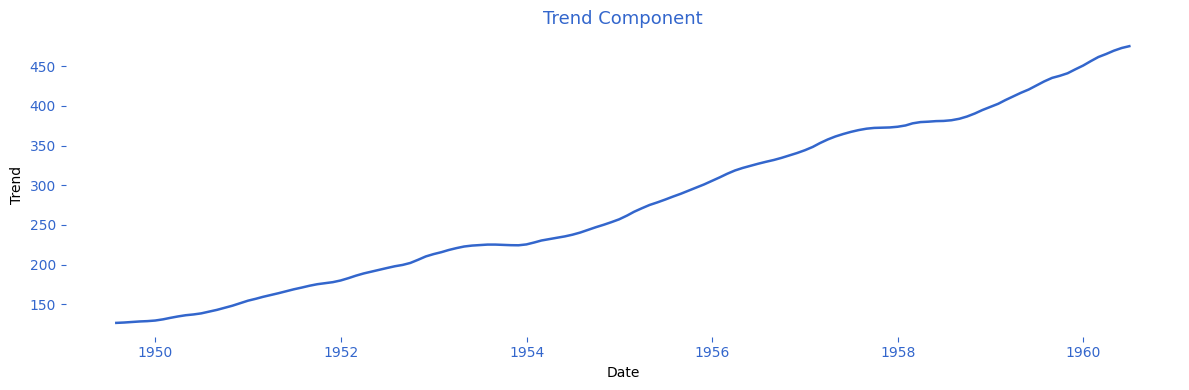

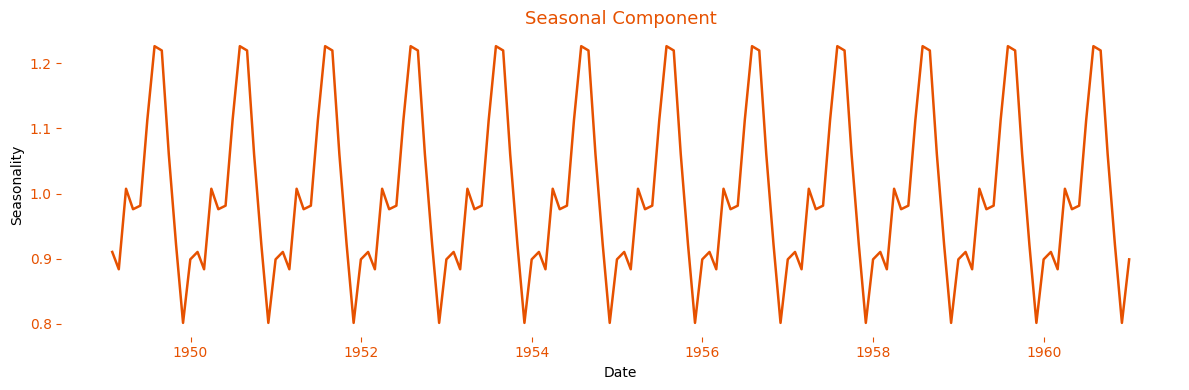

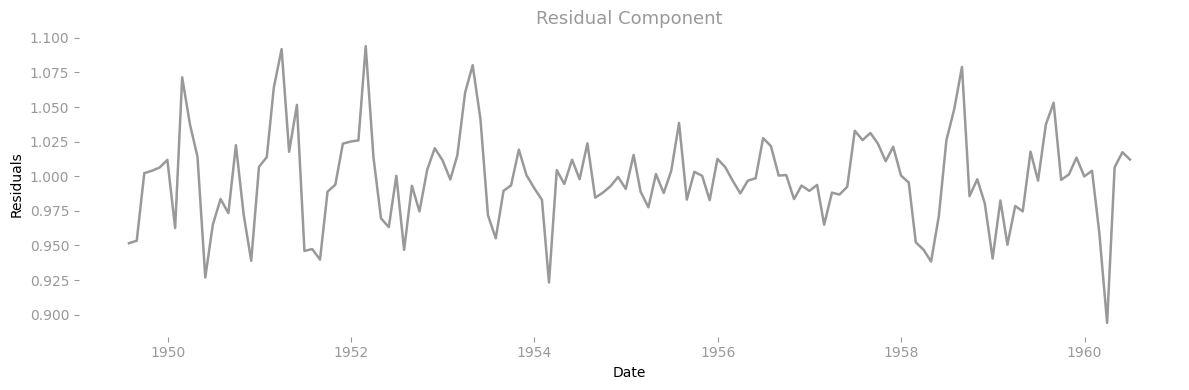

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           4.02e-61
Time:                        02:44:00   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3100      7.636     11.826      0.0

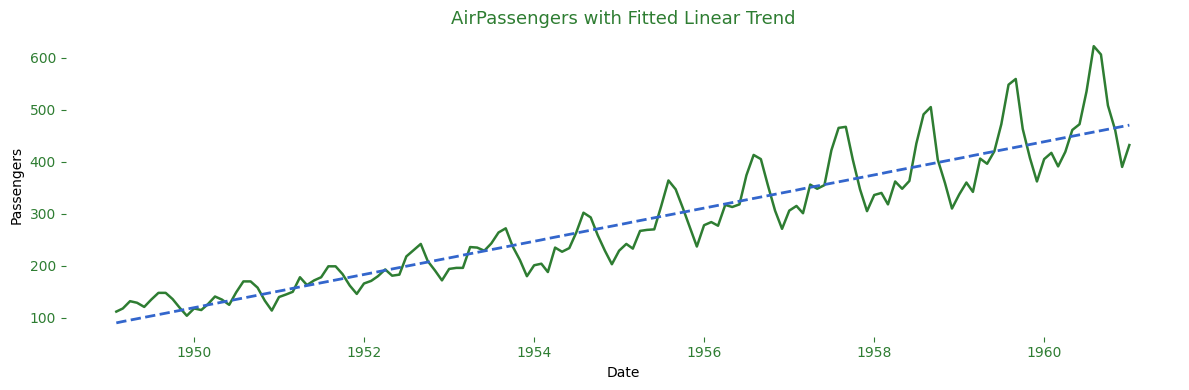

In [44]:
# --- 1. Load the classic AirPassengers dataset ---
data = sm.datasets.get_rdataset('AirPassengers').data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='ME')
data.rename(columns={'value': 'Passengers'}, inplace=True)
data.set_index('Month', inplace=True)

# --- Common style vars ---
color_main = "#2e7d32"
color_secondary = "#3366cc"
color_accent = "#e65100"
color_gray = "#999999"

# --- 2. Plot & save the raw time series ---
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(data.index, data['Passengers'], color=color_main, linewidth=1.8)
ax.set_title('Monthly Airline Passengers (1949–1960)', fontsize=13, color=color_main)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
ax.tick_params(colors=color_main)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig("./assets/airpassengers_raw.png", dpi=300, transparent=True)
plt.show()

# --- 3. Decompose: trend, seasonality, residual ---
result = seasonal_decompose(data['Passengers'], model='multiplicative')

# --- 4a. Trend ---
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(data.index, result.trend, color=color_secondary, linewidth=1.8)
ax.set_title('Trend Component', fontsize=13, color=color_secondary)
ax.set_xlabel('Date')
ax.set_ylabel('Trend')
ax.tick_params(colors=color_secondary)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig("./assets/airpassengers_trend.png", dpi=300, transparent=True)
plt.show()

# --- 4b. Seasonality ---
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(data.index, result.seasonal, color=color_accent, linewidth=1.8)
ax.set_title('Seasonal Component', fontsize=13, color=color_accent)
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality')
ax.tick_params(colors=color_accent)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig("./assets/airpassengers_seasonal.png", dpi=300, transparent=True)
plt.show()

# --- 4c. Residuals ---
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(data.index, result.resid, color=color_gray, linewidth=1.8)
ax.set_title('Residual Component', fontsize=13, color=color_gray)
ax.set_xlabel('Date')
ax.set_ylabel('Residuals')
ax.tick_params(colors=color_gray)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig("./assets/airpassengers_residuals.png", dpi=300, transparent=True)
plt.show()

# --- 5. Simple trend detection using OLS ---
time_index = np.arange(len(data))
X = add_constant(time_index)
y = data['Passengers']

model = OLS(y, X).fit()
print(model.summary())

# --- 6. Plot & save the data + fitted trend line ---
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(data.index, y, label='Actual', color=color_main, linewidth=1.8)
ax.plot(data.index, model.predict(X), label='Fitted Trend (OLS)', color=color_secondary, linestyle='--', linewidth=2)
ax.set_title('AirPassengers with Fitted Linear Trend', fontsize=13, color=color_main)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
ax.tick_params(colors=color_main)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig("./assets/airpassengers_trend_fit.png", dpi=300, transparent=True)
plt.show()


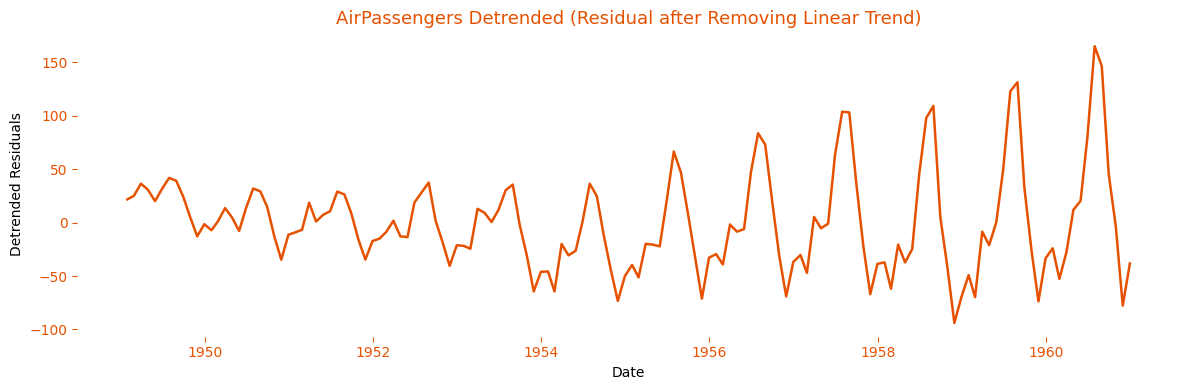

In [46]:
# --- 7. Detrend: Subtract the fitted trend from original data ---
detrended = y - model.predict(X)

# --- 8. Plot & save the detrended series ---
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(data.index, detrended, color=color_accent, linewidth=1.8)
ax.set_title('AirPassengers Detrended (Residual after Removing Linear Trend)', 
             fontsize=13, color=color_accent)
ax.set_xlabel('Date')
ax.set_ylabel('Detrended Residuals')
ax.tick_params(colors=color_accent)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig("./assets/airpassengers_detrended.png", dpi=300, transparent=True)
plt.show()
